# Visualizations

Exploratory…Literally showing what data exists in our responses as an introduction to our analysis

“Analysis Visualizations” … correlations between variables

Examples: stress vs when you started, when was assigned/when you started, difficulty of project vs when you started (procrastination), 

Stress correlated with difficulty 

Stress levels vs. type of deadline (once a week, once every 2 weeks, one deadline at end)

Stress levels vs. amount of time given to work on project (subtract final deadline from when it was initially assigned)

Look at number of hours committed and amt of progress 


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

#responses = pd.read_csv("https://raw.githubusercontent.com/")
responses = pd.read_csv("Responses.csv")

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data Cleaning

In [2]:
#Here we remove some of the columns that do not pertain to our question
trim_responses = responses.drop(['Timestamp', 'What day are you filling out this survey?', 
                                 'Name (Leave blank for Anonymous)', 'UCSD Email (Leave blank for Anonymous)',
                                 'If yes, what class is it? (only put down one class)',
                                 'Please explain further about what the final project is about.',
                                 'Please explain what kind of deadlines you have. Can put N/A if you do not have a deadline.',
                                 'You can place your questions and comments here. '], axis=1)

In [3]:
#Find null values in each of the datasets we run:
trim_responses.isnull().sum()

Do you have a project due at the end of your class? Could be a group presentation, a final exam, an essay or a self presentation.    0
Why are you taking this class?                                                                                                       0
Is there a long term final project you are preparing in the class? (long term = final deadline is 4 weeks or longer)                 0
What type of project is it?                                                                                                          0
When are the deadlines for the project?                                                                                              0
Are you creating your own deadlines for this project?                                                                                0
If you are creating your own deadlines please fill out how often you set your deadlines for studying for this class.                 1
How often are you meeting this deadline?               

In [4]:
# Row 16 has a N/A
trim_responses[trim_responses['If you are creating your own deadlines please fill out how often you set your deadlines for studying for this class.'].isnull()]
# Row 27 has a N/A
trim_responses[trim_responses['How much has the deadlines or deadline helped you work on the project?'].isnull()]
# Row 27 and 32 have N/A
trim_responses[trim_responses['How much has your deadlines helped you?'].isnull()]

# Index is different to account for drops
trim_responses = trim_responses.drop(trim_responses.index[16])
trim_responses = trim_responses.drop(trim_responses.index[26])
trim_responses = trim_responses.drop(trim_responses.index[30])
trim_responses.isnull().sum().sum()
#Now there are no null values

0

In [5]:
trim_responses

,"Do you have a project due at the end of your class? Could be a group presentation, a final exam, an essay or a self presentation.",Why are you taking this class?,Is there a long term final project you are preparing in the class? (long term = final deadline is 4 weeks or longer),What type of project is it?,When are the deadlines for the project?,Are you creating your own deadlines for this project?,If you are creating your own deadlines please fill out how often you set your deadlines for studying for this class.,How often are you meeting this deadline?,When was the project initially assigned? (please specify what week in the academic quarter),What is the final deadline for the project? (please specify what week in the academic quarter),When did you start working on the project? (please specify what week in the academic quarter),How many hours have you committed to this project so far?,"On a scale of 1-10, how much progress have you made on your project thus far?",How much has the deadlines or deadline helped you work on the project?,How has your overall stress been while meeting these deadlines?,How much has your deadlines helped you?,How do you feel about the amount of work required for the project?,How difficult is the project for you?
0,Yes,Major requirement,Yes,Group presentation,Every two weeks,No,prof set deadlines at every 2 weeks,I am completely on top of my deadlines,Week 2,Finals Week,Week 3,More than 16 hours,8,9.0,7,9.0,7,5
1,Yes,Personal interest,Yes,Group presentation,One final deadline,No,"No, I have one deadline at the end",I have missed a couple but overall I am on top...,Week 5,Finals Week,Week 7,5-10 hours,5,9.0,7,7.0,7,4
2,Yes,Major requirement,No,Data analysis group projects for all the home...,Every two weeks,No,Once a week,I am completely on top of my deadlines,Week 8,Finals Week,Week 9,1-4 hours,10,9.0,3,10.0,7,4
3,Yes,General Education requirement,No,Group presentation,One final deadline,No,"No, I have one deadline at the end",I only have one final deadline,Week 1,Week 10,Week 1,10-15 hours,8,1.0,7,7.0,7,4
4,Yes,Major requirement,No,Essay,One final deadline,No,"No, I have one deadline at the end",I only have one final deadline,Week 1,Week 10,Week 9,Not at all,1,1.0,1,1.0,7,7
5,Yes,General Education requirement,No,Group presentation,One final deadline,Yes,"No, I have one deadline at the end",I only have one final deadline,Week 1,Week 10,Week 9,Not at all,1,2.0,5,1.0,7,7
6,Yes,Major requirement,Yes,"Essay, Self presentation",One final deadline,No,"No, I have one deadline at the end","On track, but not ready to submit.",Week 1,Finals Week,Week 6,10-15 hours,6,8.0,2,7.0,7,5
7,Yes,Personal interest,Yes,Self presentation,One final deadline,Yes,"No, I have one deadline at the end",I am completely on top of my deadlines,Finals Week,Finals Week,Week 1,1-4 hours,4,7.0,8,9.0,5,10
8,Yes,Major requirement,No,Exam,One final deadline,No,"No, I have one deadline at the end",I only have one final deadline,Week 1,Finals Week,Week 10,1-4 hours,5,4.0,4,4.0,5,3
9,Yes,Minor requirement,Yes,Essay,One final deadline,No,"No, I have one deadline at the end",I only have one final deadline,Week 1,Week 9,Week 8,1-4 hours,2,4.0,8,5.0,6,5


In [6]:
# Make the data numerical
trim_responses['When did you start working on the project? (please specify what week in the academic quarter)'] = trim_responses['When did you start working on the project? (please specify what week in the academic quarter)'].str.replace('Finals', '11')
trim_responses['When did you start working on the project? (please specify what week in the academic quarter)'] = trim_responses['When did you start working on the project? (please specify what week in the academic quarter)'].str.replace('Week', '')
trim_responses['When did you start working on the project? (please specify what week in the academic quarter)'] = trim_responses['When did you start working on the project? (please specify what week in the academic quarter)'].str.replace('week', '')
trim_responses['When did you start working on the project? (please specify what week in the academic quarter)'] = pd.to_numeric(trim_responses['When did you start working on the project? (please specify what week in the academic quarter)'])

In [7]:
trim_responses

,"Do you have a project due at the end of your class? Could be a group presentation, a final exam, an essay or a self presentation.",Why are you taking this class?,Is there a long term final project you are preparing in the class? (long term = final deadline is 4 weeks or longer),What type of project is it?,When are the deadlines for the project?,Are you creating your own deadlines for this project?,If you are creating your own deadlines please fill out how often you set your deadlines for studying for this class.,How often are you meeting this deadline?,When was the project initially assigned? (please specify what week in the academic quarter),What is the final deadline for the project? (please specify what week in the academic quarter),When did you start working on the project? (please specify what week in the academic quarter),How many hours have you committed to this project so far?,"On a scale of 1-10, how much progress have you made on your project thus far?",How much has the deadlines or deadline helped you work on the project?,How has your overall stress been while meeting these deadlines?,How much has your deadlines helped you?,How do you feel about the amount of work required for the project?,How difficult is the project for you?
0,Yes,Major requirement,Yes,Group presentation,Every two weeks,No,prof set deadlines at every 2 weeks,I am completely on top of my deadlines,Week 2,Finals Week,3,More than 16 hours,8,9.0,7,9.0,7,5
1,Yes,Personal interest,Yes,Group presentation,One final deadline,No,"No, I have one deadline at the end",I have missed a couple but overall I am on top...,Week 5,Finals Week,7,5-10 hours,5,9.0,7,7.0,7,4
2,Yes,Major requirement,No,Data analysis group projects for all the home...,Every two weeks,No,Once a week,I am completely on top of my deadlines,Week 8,Finals Week,9,1-4 hours,10,9.0,3,10.0,7,4
3,Yes,General Education requirement,No,Group presentation,One final deadline,No,"No, I have one deadline at the end",I only have one final deadline,Week 1,Week 10,1,10-15 hours,8,1.0,7,7.0,7,4
4,Yes,Major requirement,No,Essay,One final deadline,No,"No, I have one deadline at the end",I only have one final deadline,Week 1,Week 10,9,Not at all,1,1.0,1,1.0,7,7
5,Yes,General Education requirement,No,Group presentation,One final deadline,Yes,"No, I have one deadline at the end",I only have one final deadline,Week 1,Week 10,9,Not at all,1,2.0,5,1.0,7,7
6,Yes,Major requirement,Yes,"Essay, Self presentation",One final deadline,No,"No, I have one deadline at the end","On track, but not ready to submit.",Week 1,Finals Week,6,10-15 hours,6,8.0,2,7.0,7,5
7,Yes,Personal interest,Yes,Self presentation,One final deadline,Yes,"No, I have one deadline at the end",I am completely on top of my deadlines,Finals Week,Finals Week,1,1-4 hours,4,7.0,8,9.0,5,10
8,Yes,Major requirement,No,Exam,One final deadline,No,"No, I have one deadline at the end",I only have one final deadline,Week 1,Finals Week,10,1-4 hours,5,4.0,4,4.0,5,3
9,Yes,Minor requirement,Yes,Essay,One final deadline,No,"No, I have one deadline at the end",I only have one final deadline,Week 1,Week 9,8,1-4 hours,2,4.0,8,5.0,6,5


([<matplotlib.axis.XTick at 0x7f7d8940ea30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

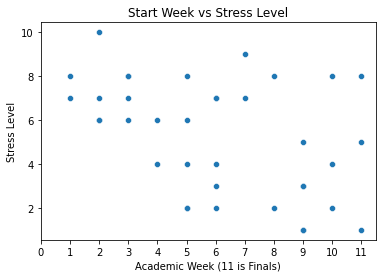

In [11]:
# Start date vs Stress Level
sns.scatterplot(data=trim_responses, x="When did you start working on the project? (please specify what week in the academic quarter)", y="How has your overall stress been while meeting these deadlines?")
plt.title("Start Week vs Stress Level")
plt.xlabel("Academic Week (11 is Finals)")
plt.ylabel("Stress Level")
plt.xticks(range(12))

([<matplotlib.axis.XTick at 0x7f7d89380430>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

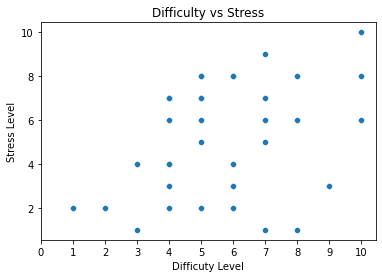

In [12]:
#Difficulty vs Stress Level
sns.scatterplot(data=trim_responses, x="How difficult is the project for you?", y="How has your overall stress been while meeting these deadlines?")
plt.title("Difficulty vs Stress")
plt.xlabel("Difficuty Level")
plt.ylabel("Stress Level")
plt.xticks(range(11))

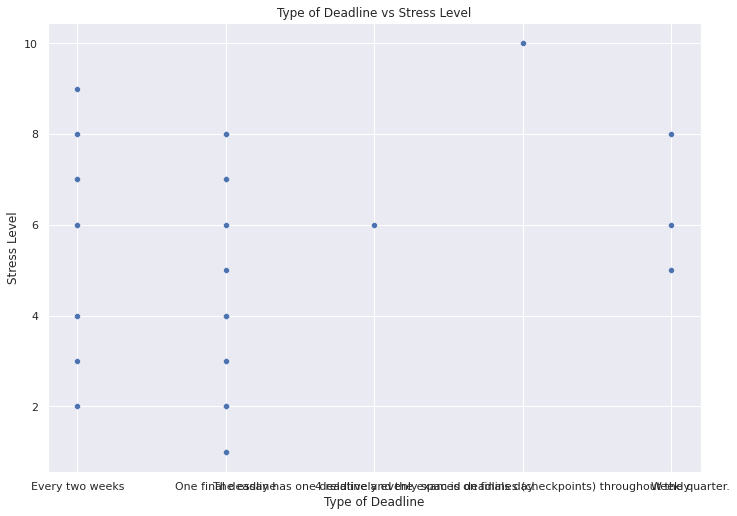

In [16]:
#Type of Deadline vs Stress Level
# Need to scrub data so x-axis makes more sense
# Need to account for the responses that are more descriptive
sns.scatterplot(data=trim_responses, x="When are the deadlines for the project?", y="How has your overall stress been while meeting these deadlines?")
plt.title("Type of Deadline vs Stress Level")
plt.xlabel("Type of Deadline")
plt.ylabel("Stress Level")
sns.set(rc={'figure.figsize':(20, 30)})